# Decision Trees
- Decision Trees can perform both classification and regression tasks, and even multioutput tasks.
- Decision Trees are also the fundamental components of Random Forests

## Training and Visualizing a Decision Tree
$DecisionTreeClassifier$ train on the iris dataset.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

We can visualize the trained Decision Tree by first using the **export_graphviz()**
method to output a graph definition file called **iris_tree.dot**

In [2]:
from sklearn.tree import export_graphviz
import os

image_path = os.path.join('.')


export_graphviz(tree_clf,
               out_file = os.path.join(image_path, "iris_tree.dot"),
               feature_names = iris.feature_names[2:],
               class_names = iris.target_names)

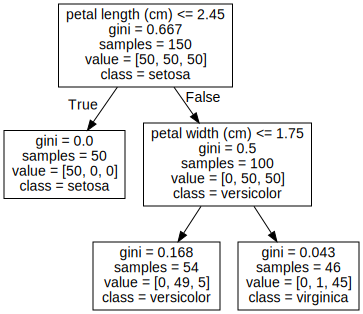

In [3]:
from graphviz import Source

Source.from_file(os.path.join(image_path, "iris_tree.dot"))

## Making Predictions

One of the many qualities of Decision Trees is that they require
very little data preparation. In particular, they don’t require **feature
scaling or centering** at all.

- A node’s samples attribute counts how many training instances it applies to. For example, 100 training instances have a petal length greater than 2.45 cm.
- Anode’s value attribute tells you how many training instances of each class this node applies to. For example, the bottom-right node applies to 0 Iris-Setosa, 1 Iris- Versicolor, and 45 Iris-Virginica.
- A node’s gini attribute measures its impurity: a node is “pure” (gini=0) if all training instances it applies to belong to the same class.

<img src="images/gini.png" width="800" />

- $p_i,_k$ is the ratio of class $k$ instances among the training instances in the $ith $ node.

<img src="images/gini_2.png" width="600" />

<img src="images/gini_3.png" width="600" />

<br>

Scikit-Learn uses the CART algorithm, which produces only binary
trees: nonleaf nodes always have two children (i.e., questions only
have yes/no answers).

**Decision Tree's decision boundaries**

<img src="images/dt_decision_boundaries.jpg" width="600" />

- The left area is pure (only Iris-Setosa), it cannot be split any further.
- the right area is impure, so the depth-1 right node splits it at petal width = 1.75 cm (represented by the dashed line).

## Estimating Class Probabilities

In [4]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [5]:
tree_clf.predict([[5, 1.5]])

array([1])

## The CART Training Algorithm

Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train
Decision Trees (also called “growing” trees).
The algorithm first splits the training set in two subsets using a single feature k and a threshold
$t_k$ (e.g., “petal length ≤ 2.45 cm”). <br>

How does it choose k and tk? <br>
It searches for the pair $(k, t_k)$ that produces the purest subsets (weighted by their size).

<img src="images/cost_func_cart.png" width="600" />

Once it has successfully split the training set in two, it splits the subsets using the
same logic, then the sub-subsets and so on, recursively. It stops recursing once it reaches
the maximum depth (defined by the max_depth hyperparameter), or if it cannot
find a split that will reduce impurity.

## Computational Complexity

- Decision Trees are generally approximately balanced, so traversing the Decision Tree requires going through roughly 
  $O(log_2(m))$ nodes. Since each node only requires
  checking the value of one feature, the overall prediction complexity is just $O(log_2(m))$,
  independent of the number of features. So predictions are very fast, even when dealing with large training sets.

## Gini Impurity or Entropy?

By default, the Gini impurity measure is used, but we can select the entropy impurity
measure instead by setting the **criterion hyperparameter to "entropy".**

A set's entropy is zero when it contains instances of only one class.

<img src="images/entropy_2.png" width="600" />

<br>
<br>

<img src="images/entropy_1.png" width="600" />

Gini impurity is slightly faster to
compute, so it is a good default. However, when they differ, Gini impurity tends to
isolate the most frequent class in its own branch of the tree, while entropy tends to
produce slightly more balanced trees.

## Regularization Hyperparameters

If DT left unconstrained, the structure will adapt itself to the training data, fitting it very
closely, and most likely overfitting it. Such a model is often called a **nonparametric**
model, not because it does not have any parameters (it often has a lot) but because **the
number of parameters is not determined prior to training,** so the model structure is
free to stick closely to the data.

In contrast, a **parametric model** such as a linear model
has a predetermined number of parameters, so its degree of freedom is limited,
reducing the risk of overfitting (but increasing the risk of underfitting).

To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom
during training, this is called **regularization**. The regularization
hyperparameters depend on the algorithm used, but generally we can at least restrict
the maximum depth of the Decision Tree. In Scikit-Learn, this is controlled by the
**max_depth hyperparameter** (the default value is None, which means unlimited).
Reducing max_depth will regularize the model and thus reduce the risk of overfitting.

The **DecisionTreeClassifier class** has a few other parameters that similarly restrict
the shape of the Decision Tree: 
- min_samples_split (the minimum number of samples a node must have before it can be split)
- min_samples_leaf (the minimum number of samples a leaf node must have)
- min_weight_fraction_leaf (same as min_samples_leaf but expressed as a fraction of the total number of weighted instances)
- max_leaf_nodes (maximum number of leaf nodes)
- max_features (maximum number of features that are evaluated for splitting at each node).

**Increasing min_*** hyperparameters or **reducing max_*** hyperparameters will regularize the model.

Other algorithms work by first training the Decision Tree without
restrictions, then pruning (deleting) unnecessary nodes. A node
whose children are all leaf nodes is considered unnecessary if the
purity improvement it provides is not statistically significant. <br>
**Standard statistical tests, such as the χ2 test**, are used to estimate the
probability that the improvement is purely the result of chance
(which is called the null hypothesis). If this probability, called the **p-value**,
is higher than a given threshold (typically 5%, controlled by
a hyperparameter), then the node is considered unnecessary and its
children are deleted. The pruning continues until all unnecessary
nodes have been pruned.

## Regression

Instead of predicting a class like Classification tree, it predicts a value in each node.

In [ ]:
# Quadratic training set + noise

import numpy as np
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [7]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [8]:
export_graphviz(tree_reg,
                out_file = os.path.join(image_path, "reg_tree.dot"),
                feature_names = ["x1"],
                rounded=True,
                filled=True
               )

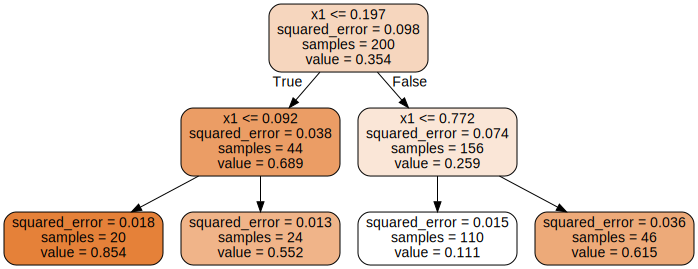

In [9]:
Source.from_file(os.path.join(image_path, "reg_tree.dot"))

CART algorithm works mostly the same way as earlier, except that instead of trying
to split the training set in a way that minimizes impurity, it now tries to split the
training set in a way that minimizes the MSE.

<img src="images/reg_tree.png" width="900" />

## Instability

DT have a few limitations.
- Decision Trees love orthogonal decision boundaries (all splits are perpendicular to an axis), which makes them sensitive to training set rotation. <br>(PCA can be used to limit this problem )
- Decision Trees is that they are very sensitive to small variations in the training data. <br>
  For example, if you just remove the widest Iris-Versicolor from the iris training set (the one with petals 4.8 cm long and 1.8   cm wide) and train a new Decision Tree, you may get the model very different from the previous Decision Tree. <br>
  (Random Forest can be used to limit this problem)